## Сверточные нейронные сети

### Задание:
#### Используя файл Web4.ipynb (он в полезных ссылках):

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

2. оценить рост точности при увеличении ширины сети (больше фильтров)

3. оценить рост точности при увеличении глубины сети (больше слоев)

4. *  сравнить с точностью полносвязной сети для этой выборки

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.random.set_seed(1)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [9]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [10]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

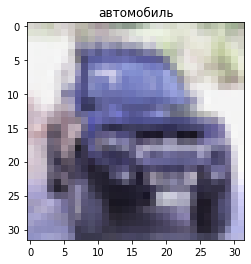

In [11]:
N = 9

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10


In [12]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [13]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 71s 90ms/step - loss: 2.0145 - accuracy: 0.2092 - val_loss: 1.7778 - val_accuracy: 0.2923
Epoch 2/10
782/782 [==============================] - 72s 92ms/step - loss: 1.7439 - accuracy: 0.3207 - val_loss: 1.5269 - val_accuracy: 0.4203
Epoch 3/10
782/782 [==============================] - 70s 89ms/step - loss: 1.6255 - accuracy: 0.3783 - val_loss: 1.4224 - val_accuracy: 0.4544
Epoch 4/10
782/782 [==============================] - 69s 88ms/step - loss: 1.5376 - accuracy: 0.4244 - val_loss: 1.3722 - val_accuracy: 0.4889
Epoch 5/10
782/782 [==============================] - 70s 90ms/step - loss: 1.4719 - accuracy: 0.4539 - val_loss: 1.2653 - val_accuracy: 0.5344
Epoch 6/10
782/782 [==============================] - 69s 88ms/step - loss: 1.4296 - accuracy: 0.4743 - val_loss: 1.2291 - val_accuracy: 0.5460
Epoch 7/10
782/782 [==============================] - 69s 89ms/step - loss: 1.3991 - accuracy: 0.4874 - val_loss: 1.2109 - val_accuracy:

In [14]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 12s - loss: 1.0878 - accuracy: 0.6046 - 12s/epoch - 8ms/step
313/313 - 3s - loss: 1.1154 - accuracy: 0.5958 - 3s/epoch - 8ms/step
train_loss: 1.087769865989685, train_accuracy: 0.6046199798583984
test_loss: 1.1154195070266724, test_accuracy: 0.59579998254776


1/1 [==============================] - 0s 18ms/step


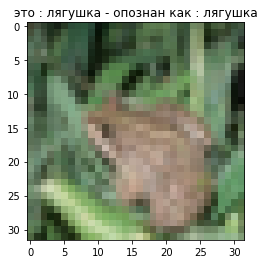

In [18]:
N = 4
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 2. Оценить рост точности при увеличении ширины сети (больше фильтров)

In [19]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [20]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 138s 175ms/step - loss: 1.9386 - accuracy: 0.2497 - val_loss: 1.6180 - val_accuracy: 0.3789
Epoch 2/10
782/782 [==============================] - 131s 168ms/step - loss: 1.6081 - accuracy: 0.3928 - val_loss: 1.4002 - val_accuracy: 0.4814
Epoch 3/10
782/782 [==============================] - 131s 168ms/step - loss: 1.4376 - accuracy: 0.4716 - val_loss: 1.2300 - val_accuracy: 0.5555
Epoch 4/10
782/782 [==============================] - 124s 159ms/step - loss: 1.3318 - accuracy: 0.5199 - val_loss: 1.2053 - val_accuracy: 0.5547
Epoch 5/10
782/782 [==============================] - 124s 159ms/step - loss: 1.2246 - accuracy: 0.5640 - val_loss: 1.0164 - val_accuracy: 0.6352
Epoch 6/10
782/782 [==============================] - 124s 159ms/step - loss: 1.1294 - accuracy: 0.6081 - val_loss: 0.9615 - val_accuracy: 0.6576
Epoch 7/10
782/782 [==============================] - 124s 159ms/step - loss: 1.0578 - accuracy: 0.6300 - val_loss: 0.9110 -

In [21]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 26s - loss: 0.6976 - accuracy: 0.7520 - 26s/epoch - 16ms/step
313/313 - 6s - loss: 0.7981 - accuracy: 0.7167 - 6s/epoch - 18ms/step
train_loss: 0.6976425647735596, train_accuracy: 0.7520400285720825
test_loss: 0.7980920672416687, test_accuracy: 0.71670001745224


1/1 [==============================] - 0s 18ms/step


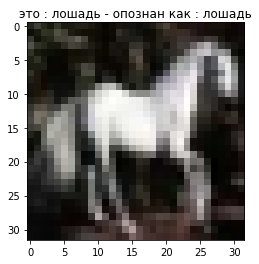

In [28]:
N = 13
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [29]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [30]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))                       

Epoch 1/10
782/782 [==============================] - 74s 93ms/step - loss: 2.0069 - accuracy: 0.2126 - val_loss: 1.7154 - val_accuracy: 0.3468
Epoch 2/10
782/782 [==============================] - 72s 91ms/step - loss: 1.6382 - accuracy: 0.3834 - val_loss: 1.3756 - val_accuracy: 0.4884
Epoch 3/10
782/782 [==============================] - 73s 94ms/step - loss: 1.4159 - accuracy: 0.4887 - val_loss: 1.2043 - val_accuracy: 0.5561
Epoch 4/10
782/782 [==============================] - 72s 92ms/step - loss: 1.2793 - accuracy: 0.5469 - val_loss: 1.0897 - val_accuracy: 0.6085
Epoch 5/10
782/782 [==============================] - 72s 92ms/step - loss: 1.1830 - accuracy: 0.5873 - val_loss: 0.9936 - val_accuracy: 0.6492
Epoch 6/10
782/782 [==============================] - 75s 96ms/step - loss: 1.1080 - accuracy: 0.6165 - val_loss: 0.9407 - val_accuracy: 0.6744
Epoch 7/10
782/782 [==============================] - 74s 95ms/step - loss: 1.0588 - accuracy: 0.6382 - val_loss: 0.9151 - val_accuracy:

In [31]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 17s - loss: 0.7169 - accuracy: 0.7490 - 17s/epoch - 11ms/step
313/313 - 3s - loss: 0.8322 - accuracy: 0.7242 - 3s/epoch - 10ms/step
train_loss: 0.7168733477592468, train_accuracy: 0.7489799857139587
test_loss: 0.8321647644042969, test_accuracy: 0.7242000102996826


1/1 [==============================] - 0s 18ms/step


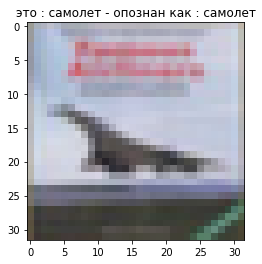

In [34]:
N = 3
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [35]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc

In [36]:
results

,step,desc,train_acc
0,1,Базовая модель,0.60
1,2,Шире - больше каналов,0.75
2,3,Глубже - больше слоев,0.75


### Выводы:<br>
* увеличение количества каналов, т.е. увеличение итогового количества признаков, увеличило значение метрики;
* увеличение глубины сети тоже увеличило метрику качества, но это всё равно ниже, чем с большом кол-вом каналов;